In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc

rc('animation', html='jshtml')
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = [12, 10]

In [3]:
def reset():
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

L = 10

# The grid is n+1 points along x and y, including boundary points 0 and n
n = 10

# The grid spacing is L/n

# The number of iterations
nsteps = 10

# Initialize the grid to 0
v = np.zeros((n+1, n+1))
vnew = np.zeros((n+1, n+1))
reset()

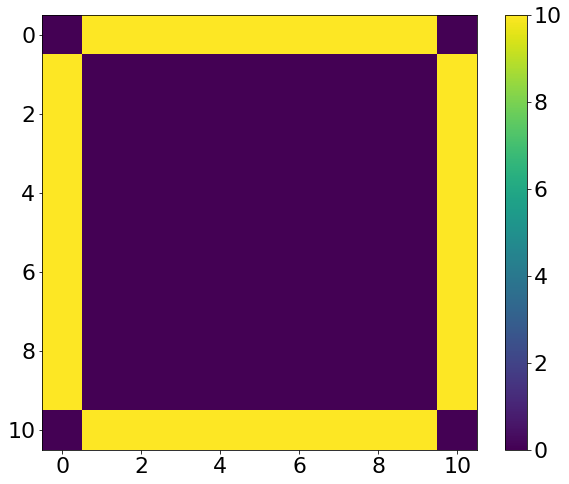

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(v, cmap=None, interpolation='nearest')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

# checker=1: no checkboard, checker=2: checkerboard (note: n should be even)
checker = 1

In [5]:
# perform one step of relaxation
def relax(n, v, checker):
    for check in range(0,checker):
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    vnew[x,y] = (v[x-1][y] + v[x+1][y] + v[x][y-1] + v[x][y+1])*0.25

        # Copy back the new values to v
        # Note that you can directly store in v instead of vnew with Gauss-Seidel or checkerboard
        for x in range(1,n):
            for y in range(1,n):
                if (x*(n+1) + y) % checker == check:
                    v[x,y] = vnew[x,y]

def update(step):
    #print(step)
    global n, v, checker

    # FuncAnimation calls update several times with step=0,
    # so we needs to skip the update with step=0 to get
    # the correct number of steps 
    if step > 0:
        relax(n, v, checker)

    im.set_array(v)
    return im,

In [6]:
# From 10
def c_helper(vexact, reset):
    global v, n
    def interate(steps):
        reset()
        for i in range(steps):
            update(i)

    reset()

    #vexact = np.full((n+1,n+1), 10*0.9)
    # remove boundaries
    vexact = np.delete(vexact, [0, n], 1)
    vexact = np.delete(vexact, [0, n], 0)
    tol = 0.01

    L = 0
    R = 1000
    while L < R:
        m = int((L+R)/2)
        interate(m) ## 55 ish
        v = np.delete(v, [0, n], 1)
        v = np.delete(v, [0, n], 0)
        accuracy = np.max((vexact-v)/vexact)
        #print((vexact[5][5]-v[5][5])/vexact[5][5],v[5][5], accuracy)
        #print(accuracy)

        if accuracy < tol:
            R = m - 1
        elif accuracy > tol:
            L = m + 1
        else:
            return m
        
    print(f"Iterations needed: {m} with gridsize: {n}, accuracy: {accuracy}")
    return m

def c_1(plot = True):
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 10
        v[n,i] = 10
        v[i,0] = 5
        v[i,n] = 5

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.contourf(v, cmap=None, origin='image')
        fig.colorbar(im, ax=ax)
        fig.patch.set_facecolor('xkcd:white')
    
def c_2(plot = True):
    global v, vnew, n
    v = np.zeros((n+1, n+1))
    vnew = np.zeros((n+1, n+1))

    # Set the boundary conditions
    for i in range(1,n):
        v[0,i] = 0
        v[n,i] = 10
        v[i,0] = 10
        v[i,n] = 10

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        im = ax.contourf(v, cmap=None, origin='image')
        fig.colorbar(im, ax=ax)
        fig.patch.set_facecolor('xkcd:white')

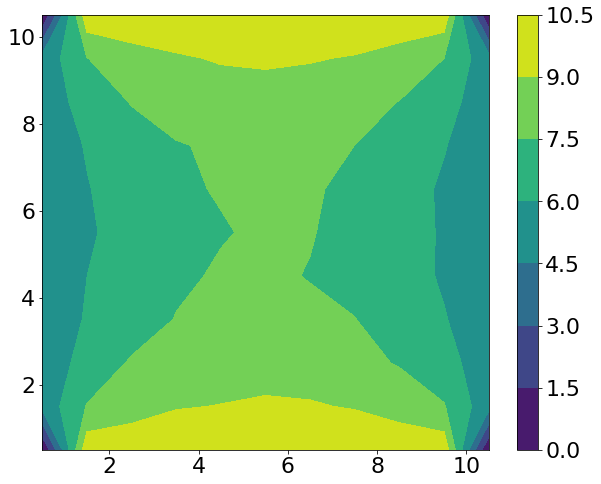

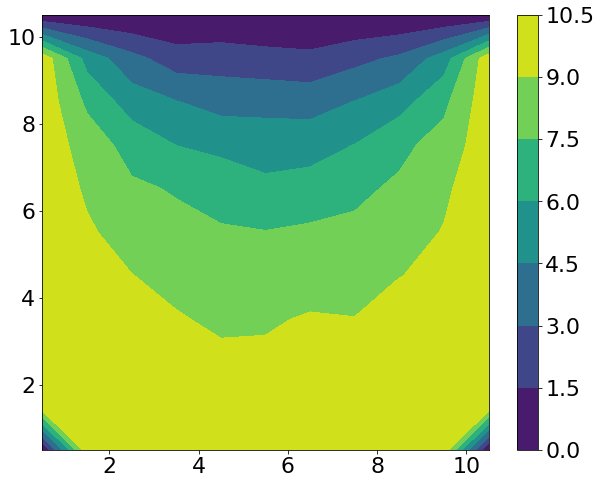

In [9]:
### Random walk a)
walkers = 1000

def walk(x,y, steps): 
    xd = x
    yd = y
    V = 0
    for i in range(steps):
        x = xd
        y = yd
        while 0 < x < n and 0 < y < n:
            R = np.random.randint(1,5)  # Random number between 1 and 4
            if R < 3:   # Move on the x axis
                if R == 1:
                    R = 1
                else:
                    R = -1
                x += R
            else:       # Move on the y axis
                if R == 3:
                    R = 1
                else:
                    R = -1
                y += R
        # reached the border
        V += v[x][y]
    
    return 1/steps * V

        
c_1(False)
for x in range(1,n):
    for y in range(1,n):
        v[x][y] = walk(x,y, walkers)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(v, cmap=None, origin='image')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

c_2(False)
for x in range(1,n):
    for y in range(1,n):
        v[x][y] = walk(x,y, walkers)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(v, cmap=None, origin='image')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

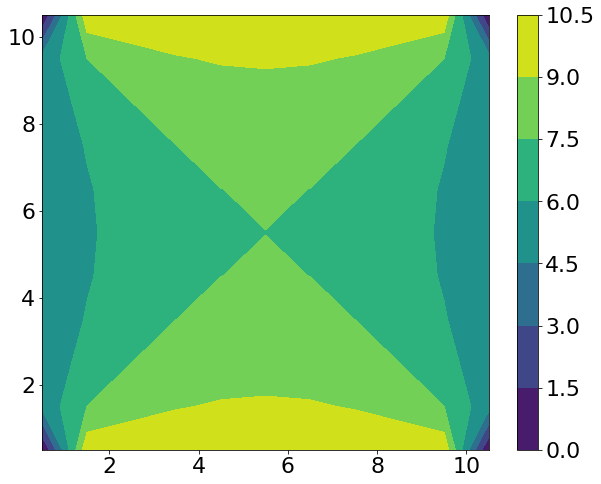

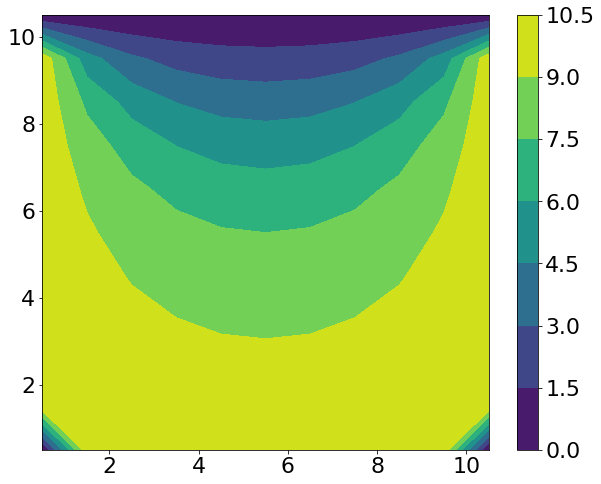

In [10]:
c_1(False)
for i in range(150):
    update(i)

vrelax1 = v.copy()
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(v, cmap=None, origin='image')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

c_2(False)
for i in range(150):
    update(i)

vrelax2 = v.copy()
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(v, cmap=None, origin='image')
fig.colorbar(im, ax=ax)
fig.patch.set_facecolor('xkcd:white')

In [11]:
points = [(n//2, n//2), (3, 6), (2,2)]
iters = 5

x_axis = [int(x) for x in np.linspace(2,1200, 100)]
vwalkavg1 = []
vwalkavg2 = []
#vwalk1 = []
#vwalk2 = []
vwalkstd1 = []
vwalkstd2 = []
for point in points:
    tvwalk1 = np.full((len(x_axis), iters), np.zeros(iters)) #[[0,]*iters,] * len(x_axis)
    tvwalk2 = np.full((len(x_axis), iters), np.zeros(iters)) #[[0,]*iters,] * len(x_axis)
    for i in range(iters):
        print(i)
        for j in range(len(x_axis)):
            c_1(False)
            #tvwalk1.append([walk(point[0], point[1], w) for w in x_axis])
            tvwalk1[j][i] = walk(point[0], point[1], x_axis[j])

            c_2(False)
            #tvwalk2.append([walk(point[0], point[1], w) for w in x_axis])
            tvwalk2[j][i] = walk(point[0], point[1], x_axis[j])

    #vwalk1.append([x[0] for x in tvwalk1])
    #vwalk2.append([x[0] for x in tvwalk2])
    vwalkavg1.append([np.average(x) for x in tvwalk1])
    vwalkavg2.append([np.average(x) for x in tvwalk2])
    vwalkstd1.append([np.std(vrelax1[point[0], point[1]] - x) for x in tvwalk1])
    vwalkstd2.append([np.std(vrelax2[point[0], point[1]] - x) for x in tvwalk2])

0
1
2
3
4
0
1
2
3
4
0
1
2
3
4


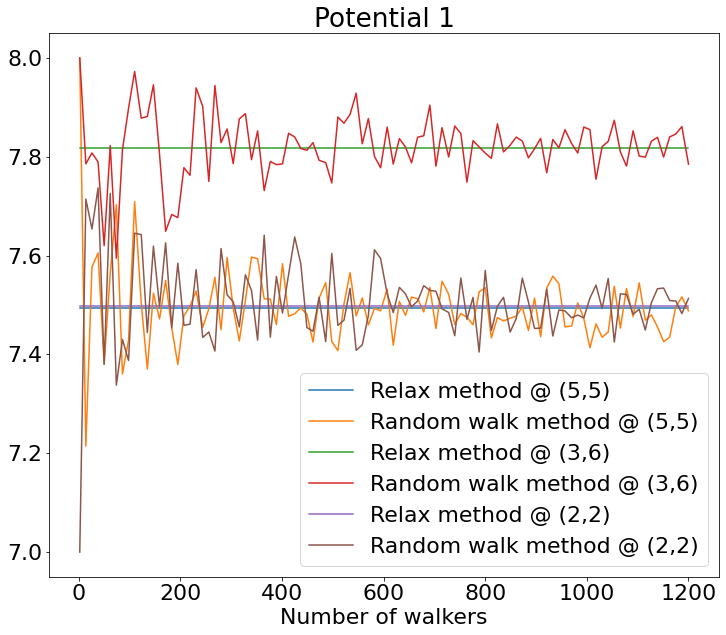

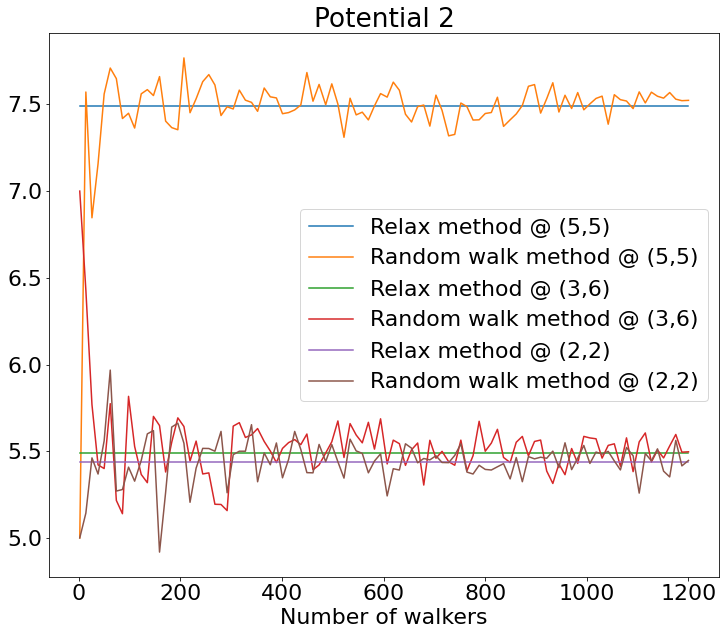

In [14]:
plt.figure()
plt.xlabel("Number of walkers")
#plt.ylim(6,10)
i = 0
for point in points:
    plt.title(f"Potential 1")
    plt.plot(x_axis, [vrelax1[point[0], point[1]] for i in x_axis], label=f"Relax method @ ({point[0]},{point[1]})")
    plt.plot(x_axis, vwalkavg1[i], label=f"Random walk method @ ({point[0]},{point[1]})")
    plt.legend()
    i += 1

plt.figure()
plt.xlabel("Number of walkers")
#plt.ylim(6,10)
i = 0
for point in points:
    plt.title(f"Potential 2")
    plt.plot(x_axis, [vrelax2[point[0], point[1]] for i in x_axis], label=f"Relax method @ ({point[0]},{point[1]})")
    plt.plot(x_axis, vwalkavg2[i], label=f"Random walk method @ ({point[0]},{point[1]})")
    plt.legend()
    i += 1

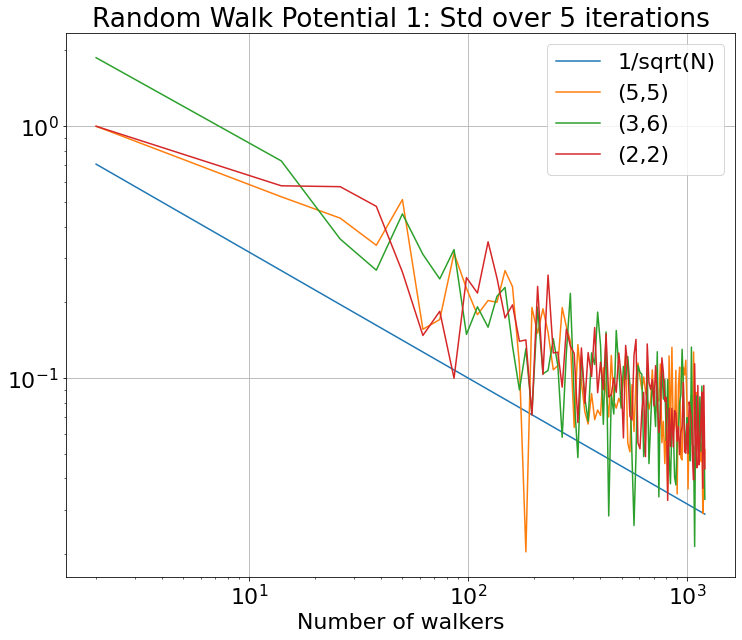

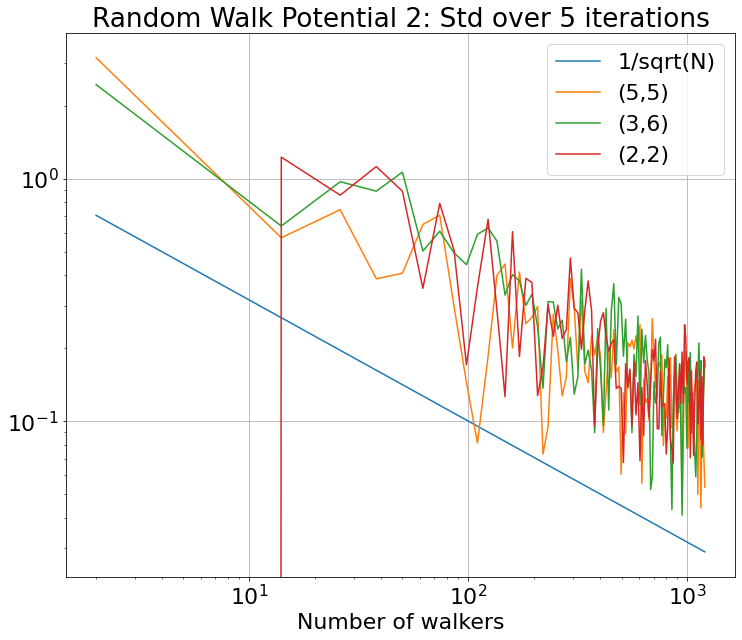

In [15]:
plt.figure()
plt.grid()
plt.xlabel("Number of walkers")
plt.loglog(x_axis, 1/np.sqrt(x_axis), label="1/sqrt(N)")
i = 0
for point in points:
    plt.title(f"Random Walk Potential 1: Std over {iters} iterations")
    plt.loglog(x_axis, vwalkstd1[i], label=f"({point[0]},{point[1]})")
    plt.legend()
    i += 1

plt.figure()
plt.grid()
plt.xlabel("Number of walkers")
plt.loglog(x_axis, 1/np.sqrt(x_axis), label="1/sqrt(N)")
i = 0
for point in points:
    plt.title(f"Random Walk Potential 2: Std over {iters} iterations")
    plt.loglog(x_axis, vwalkstd2[i], label=f"({point[0]},{point[1]})")
    plt.legend()
    i += 1